In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/squirrel_census.csv')

In [31]:
df.sample(5).T

,182,2393,66,2486,1757
X,-73.9768,-73.9786,-73.9684,-73.9595,-73.9581
Y,40.7728,40.772,40.778,40.7833,40.7961
Unique Squirrel ID,7B-AM-1008-11,6A-PM-1012-02,16E-PM-1018-06,25I-AM-1012-02,38C-AM-1019-05
Hectare,07B,06A,16E,25I,38C
Shift,AM,PM,PM,AM,AM
Date,10082018,10122018,10182018,10122018,10192018
Hectare Squirrel Number,11,2,6,2,5
Age,Adult,Adult,Adult,Adult,Adult
Primary Fur Color,Gray,Gray,Cinnamon,Cinnamon,Gray
Highlight Fur Color,NaN,White,Gray,Gray,White


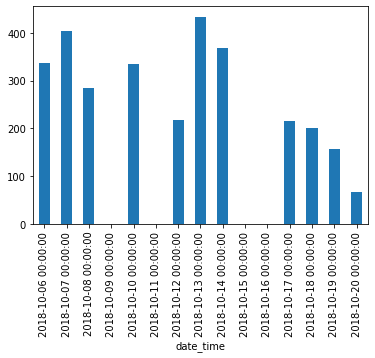

In [25]:
df['date_time'] = pd.to_datetime(df['Date'], format='%m%d%Y')

df.set_index(df['date_time']).resample('d').size().plot.bar()

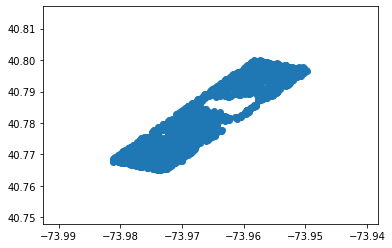

In [30]:
fig, ax = plt.subplots()

ax.scatter(df['X'], df['Y'])

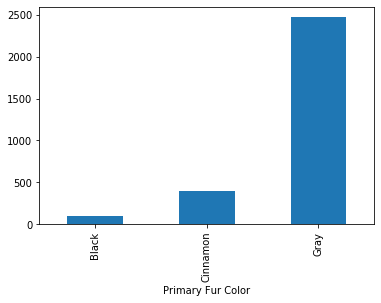

In [33]:
df.groupby('Primary Fur Color').size().plot.bar();

In [36]:
df['Lat/Long'][0]

'POINT (-73.9561344937861 40.7940823884086)'

In [38]:
import re

example = df['Lat/Long'][0]

In [69]:
pattern = r'(-?\d+.\d+)'

re.findall(pattern, example)

['-73.9561344937861', '40.7940823884086']

In [74]:
df[['_lat', '_long']] = df['Lat/Long'].str.extractall(pattern).unstack().reset_index(drop=True)

In [76]:
df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,date_time,_lat,_long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13,2018-10-14,-73.9561344937861,40.7940823884086
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13,2018-10-06,-73.9570437717691,40.794850940803904
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13,2018-10-10,-73.9768311751004,40.76671780725581
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13,2018-10-18,-73.9757249834141,40.7697032606755
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13,2018-10-18,-73.9593126695714,40.797533370163


In [79]:
df[['X', 'Y']].astype(float)

,X,Y
0,-73.956134,40.794082
1,-73.957044,40.794851
2,-73.976831,40.766718
3,-73.975725,40.769703
4,-73.959313,40.797533
...,...,...
3018,-73.963943,40.790868
3019,-73.970402,40.782560
3020,-73.966587,40.783678
3021,-73.963994,40.789915


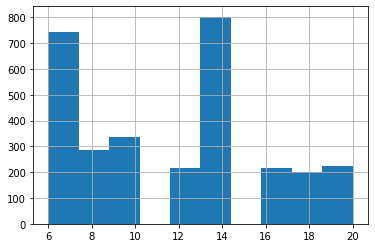

In [87]:
df['date_time'].dt.day.hist()

In [90]:


fur = df.groupby('Primary Fur Color').size()

<BarContainer object of 3 artists>

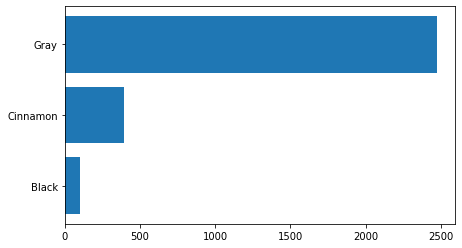

In [97]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.barh(fur.index, fur.values)
ax.set_xlim(0, 500)

In [102]:
kkh = pd.read_csv("https://raw.githubusercontent.com/bmcgarry194/knn_workshop/master/data/kc-house-data.zip")

In [104]:
kkh.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7063,3747600050,20141105T000000,319450.0,5,2.00,2250,5472,1.5,0,0,...,7,1750.0,500,1930,0,98002,47.3065,-122.219,1540,5472
4580,6398000011,20140602T000000,789000.0,3,3.00,3740,39640,2.0,0,2,...,10,3740.0,0,1991,0,98070,47.4036,-122.462,2930,26136
9518,6450301220,20140916T000000,264000.0,1,1.00,710,4725,1.0,0,0,...,6,710.0,0,1939,0,98133,47.7328,-122.340,900,5250
12729,1926049385,20140729T000000,559950.0,4,2.50,2650,7200,2.0,0,0,...,8,2250.0,400,1979,0,98133,47.7317,-122.354,2110,7269
13003,2874600040,20140804T000000,680000.0,3,2.25,2920,6300,1.0,0,0,...,8,1710.0,1210,1956,0,98177,47.7065,-122.370,1940,6300
1349,3731800055,20140605T000000,450000.0,4,1.00,2000,4676,1.5,0,0,...,7,1250.0,750,1916,1986,98118,47.5529,-122.268,1140,4676
21433,259500230,20141218T000000,465750.0,3,2.50,2670,4534,2.0,0,0,...,9,2670.0,0,2007,0,98056,47.5100,-122.184,3040,5079
20652,7883603648,20140522T000000,300000.0,5,2.50,2760,6000,2.0,0,0,...,8,2760.0,0,2006,0,98108,47.5289,-122.321,1360,6000
14748,5040800120,20140527T000000,967500.0,3,3.75,3250,5797,2.0,0,2,...,8,2370.0,880,1951,0,98199,47.6481,-122.405,1840,5797
18669,9834200975,20150210T000000,495000.0,3,3.00,1520,4080,2.0,0,0,...,7,1520.0,0,1948,0,98144,47.5720,-122.290,1320,4080


In [120]:
pd.to_datetime(kkh.date).dt.month

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: date, Length: 21613, dtype: int64

In [121]:
kkh['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])